# What is Binning:

- Binning, also known as bucketing, is a data preprocessing technique in machine learning used to group continuous numerical variables into discrete intervals or "bins".

- Each data point is then assigned a label (or) value corresponding to the bin into which it falls.

### Why do we use Binning:
- Reduce noise in data
- Handle outliers
- Simplify complex data
- Improve model intterpretablility
- Convert continuous -> Categories

### Used in:
- Decission Trees
- Rule-based models
- Business analytics
- Credit scoring, grading systems

### Types of Binning:
- Equal-width Binning(Distance Binning)
- Equal-Frequency Binning(Quantile Binning)
- Custom / Domain-Based Binning


## 1. Equal-Width Binning(Distance Binning):
- Equal-Width Binning divides the entire range of a continuous variable into a fixed number of bins, where is each bin has the same width(Distance)
- This method does not consider how data is distributed inside the range. It only focuses on the minimum and maximum values.

### Formulae:
- Bin Width = (max-min)/k

### Example:
[18,22,25,30,35,40,45,50]

min=18

max=50

k=4

Where, k= number of Bins

Bin_Width= (50-18)/4 = 32/4 = 8

### Bins:
- 18-26
- 26-34
- 34-42
- 42-50

### Key Points
- Count difference
- Range Same

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data = pd.DataFrame({
    "age":[18,22,25,30,35,40,45,50]
})
data

,age
0,18
1,22
2,25
3,30
4,35
5,40
6,45
7,50


## Equal-Width

In [12]:
data["age_bin"]= pd.cut(data["age"], bins=3)
data

,age,age_bin
0,18,"(17.968, 28.667]"
1,22,"(17.968, 28.667]"
2,25,"(17.968, 28.667]"
3,30,"(28.667, 39.333]"
4,35,"(28.667, 39.333]"
5,40,"(39.333, 50.0]"
6,45,"(39.333, 50.0]"
7,50,"(39.333, 50.0]"


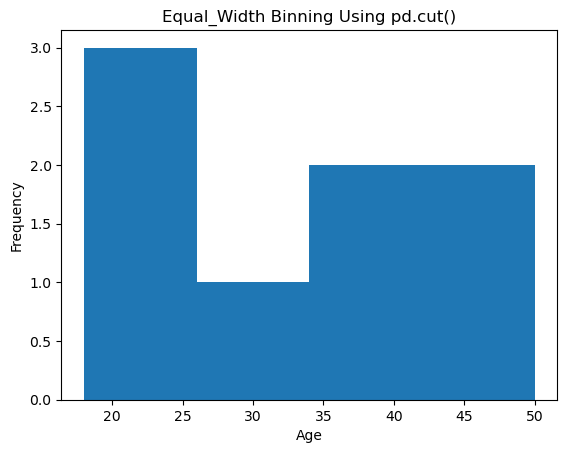

In [31]:
plt.hist(data["age"], bins=4)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Equal_Width Binning Using pd.cut()")
plt.show()

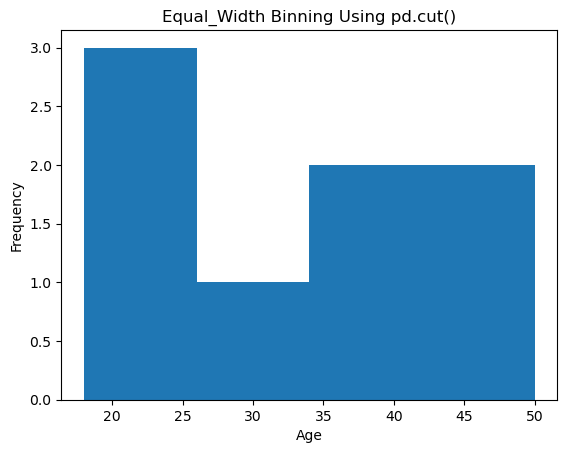

In [32]:
plt.hist(data["age"], bins=4)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Equal_Width Binning Using pd.cut()")
plt.show()

## 2. Equal-Frequency Binning(Quantile Binning):
- Equal-Frequency Binning divides the data into bins contains approximately the same number of observations.
- This methods uses data distribution and is based on quantiles(Percentails).

### Formulae:
Total Observations = n

Number of bins = k

### Observations per bin:
   n/k

### Examples:
[18,22,25,30,35,40,45,50]

### Observations per bin:
  8/4 = 2

### Bins:
- First 2 Values -> Bin 1
- Next 2 values -> Bin 2
- Next 2 values -> Bin 3
- Next 2 values -> Bin 4

### Key Points
- Count Same
- Range Difference

In [33]:
data["age_frequency_bin"]=pd.qcut(data["age"], q=4)
data

,age,age_bin,age_frequency_bin,bin_min
0,18,"(17.968, 28.667]","(17.999, 24.25]",NaN
1,22,"(17.968, 28.667]","(17.999, 24.25]",NaN
2,25,"(17.968, 28.667]","(24.25, 32.5]",NaN
3,30,"(28.667, 39.333]","(24.25, 32.5]",NaN
4,35,"(28.667, 39.333]","(32.5, 41.25]",NaN
5,40,"(39.333, 50.0]","(32.5, 41.25]",NaN
6,45,"(39.333, 50.0]","(41.25, 50.0]",NaN
7,50,"(39.333, 50.0]","(41.25, 50.0]",NaN


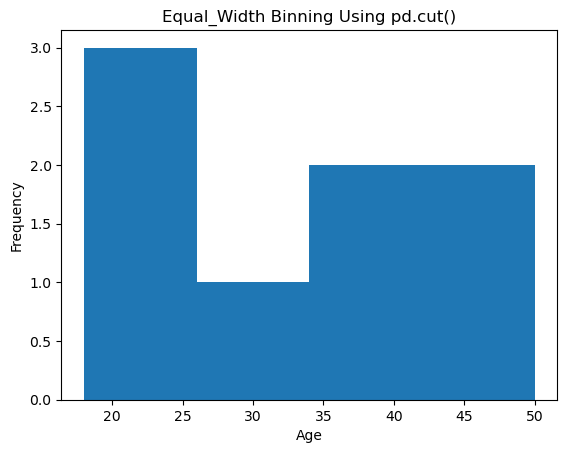

In [34]:
plt.hist(data["age"], bins=4)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Equal_Width Binning Using pd.cut()")
plt.show()

In [35]:
bin_min=data["age"].groupby(data["age_bin"]).max()
bin_min

C:\Users\satis\AppData\Local\Temp\ipykernel_2144\3043064599.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_min=data["age"].groupby(data["age_bin"]).max()


age_bin
(17.968, 28.667]    25
(28.667, 39.333]    35
(39.333, 50.0]      50
Name: age, dtype: int64

In [36]:
bin_min=data["age"].groupby(data["age_bin"]).min()
bin_min

C:\Users\satis\AppData\Local\Temp\ipykernel_2144\2778510122.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_min=data["age"].groupby(data["age_bin"]).min()


age_bin
(17.968, 28.667]    18
(28.667, 39.333]    30
(39.333, 50.0]      40
Name: age, dtype: int64

In [37]:
bin_min=data["age"].groupby(data["age_frequency_bin"]).min()
bin_min

C:\Users\satis\AppData\Local\Temp\ipykernel_2144\3652160047.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_min=data["age"].groupby(data["age_frequency_bin"]).min()


age_frequency_bin
(17.999, 24.25]    18
(24.25, 32.5]      25
(32.5, 41.25]      35
(41.25, 50.0]      45
Name: age, dtype: int64

In [38]:
data["bin_min"]= data["age"].groupby(data["age_frequency_bin"]).min()
data

C:\Users\satis\AppData\Local\Temp\ipykernel_2144\2602532548.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data["bin_min"]= data["age"].groupby(data["age_frequency_bin"]).min()


,age,age_bin,age_frequency_bin,bin_min
0,18,"(17.968, 28.667]","(17.999, 24.25]",NaN
1,22,"(17.968, 28.667]","(17.999, 24.25]",NaN
2,25,"(17.968, 28.667]","(24.25, 32.5]",NaN
3,30,"(28.667, 39.333]","(24.25, 32.5]",NaN
4,35,"(28.667, 39.333]","(32.5, 41.25]",NaN
5,40,"(39.333, 50.0]","(32.5, 41.25]",NaN
6,45,"(39.333, 50.0]","(41.25, 50.0]",NaN
7,50,"(39.333, 50.0]","(41.25, 50.0]",NaN


In [39]:
bin_min=data["age"].groupby(data["age_bin"]).mean()
bin_min

C:\Users\satis\AppData\Local\Temp\ipykernel_2144\2188877164.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_min=data["age"].groupby(data["age_bin"]).mean()


age_bin
(17.968, 28.667]    21.666667
(28.667, 39.333]    32.500000
(39.333, 50.0]      45.000000
Name: age, dtype: float64

## Custom/domain-based Binning
- Custom Binning uses Predefined bin boundaries based on domain knowledge, business rules, or external standards.
- This method is not data-driven, but context-driven.

### Example(Age Groups)
#### Bins:
- 18-25 -> Young
- 25-60 -> Adult
- 60-100 -> Senior

-These Boundaries come from real-world meaning, not calculations.

In [40]:
custom_bins=[17,25,35,50]
labels=["Young","Adult","Senior"]

bins = pd.cut(data["age"], bins=custom_bins, labels=labels)
bins

0     Young
1     Young
2     Young
3     Adult
4     Adult
5    Senior
6    Senior
7    Senior
Name: age, dtype: category
Categories (3, object): ['Young' < 'Adult' < 'Senior']

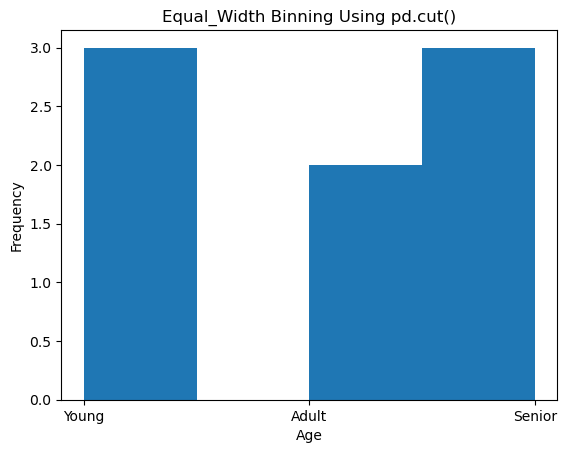

In [41]:
plt.hist(bins, bins=4)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Equal_Width Binning Using pd.cut()")
plt.show()